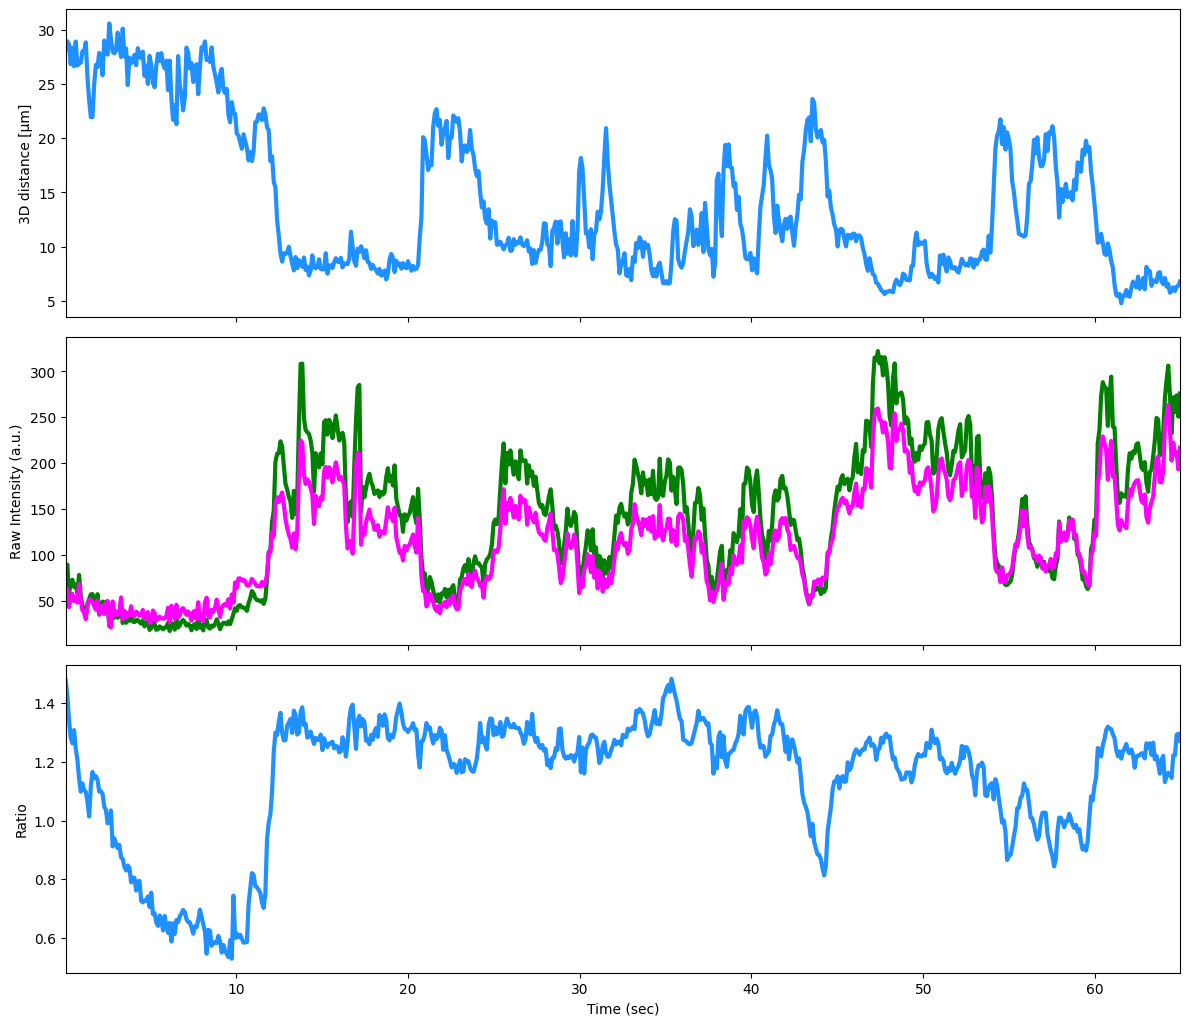

In [2]:
# === ライブラリのインポート ===
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === パラメータ設定 ===
sampling_rate = 10.24  # Hz
volume_start = 1       # timing=1 に対応する volume
width = 12
aspect_ratio = 5.71 / 6.61
height = width * aspect_ratio

# === ファイル読み込み ===
file_path = "tardigrade_t=1~665_mCherry_GCAMP6s_v2.csv"
df = pd.read_csv(file_path)

# === 時間軸を正しく換算 ===
df["Time_sec_corrected"] = (df["timing"] + volume_start - 1) / sampling_rate

# === グラフ描画 ===
fig, axs = plt.subplots(3, 1, figsize=(width, height), sharex=True)

# --- 1. 3D Distance ---
axs[0].plot(df["Time_sec_corrected"], df["3D distance (µm)"], color="dodgerblue", linewidth=3)
axs[0].set_ylabel("3D distance [µm]")
axs[0].tick_params(axis='x', labelbottom=False)

# --- 2. Raw Intensities ---
axs[1].plot(df["Time_sec_corrected"], df["GCaMP6s"], color="green", linewidth=3, label="GCaMP6s")
axs[1].plot(df["Time_sec_corrected"], df["mCherry"], color="magenta", linewidth=3, label="mCherry")
axs[1].set_ylabel("Raw Intensity (a.u.)")

axs[1].tick_params(axis='x', labelbottom=False)

# --- 3. Ratio（既存の列を使用）---
axs[2].plot(df["Time_sec_corrected"], df["Ratio"], color="dodgerblue", linewidth=3)
axs[2].set_ylabel("Ratio")
axs[2].set_xlabel("Time (sec)")

# === x軸設定（適宜調整） ===
axs[2].set_xticks(np.arange(0, df["Time_sec_corrected"].max(), 10))
axs[2].set_xlim(df["Time_sec_corrected"].min(), df["Time_sec_corrected"].max())

# === 枠線表示＆グリッドなし ===
for ax in axs:
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)

plt.tight_layout()

# === 画像として保存（任意） ===
output_filename = "tardigrade_3Dintensity_ratio_plot.png"
fig.savefig(output_filename, dpi=300, bbox_inches='tight')

# === グラフ表示 ===
plt.show()


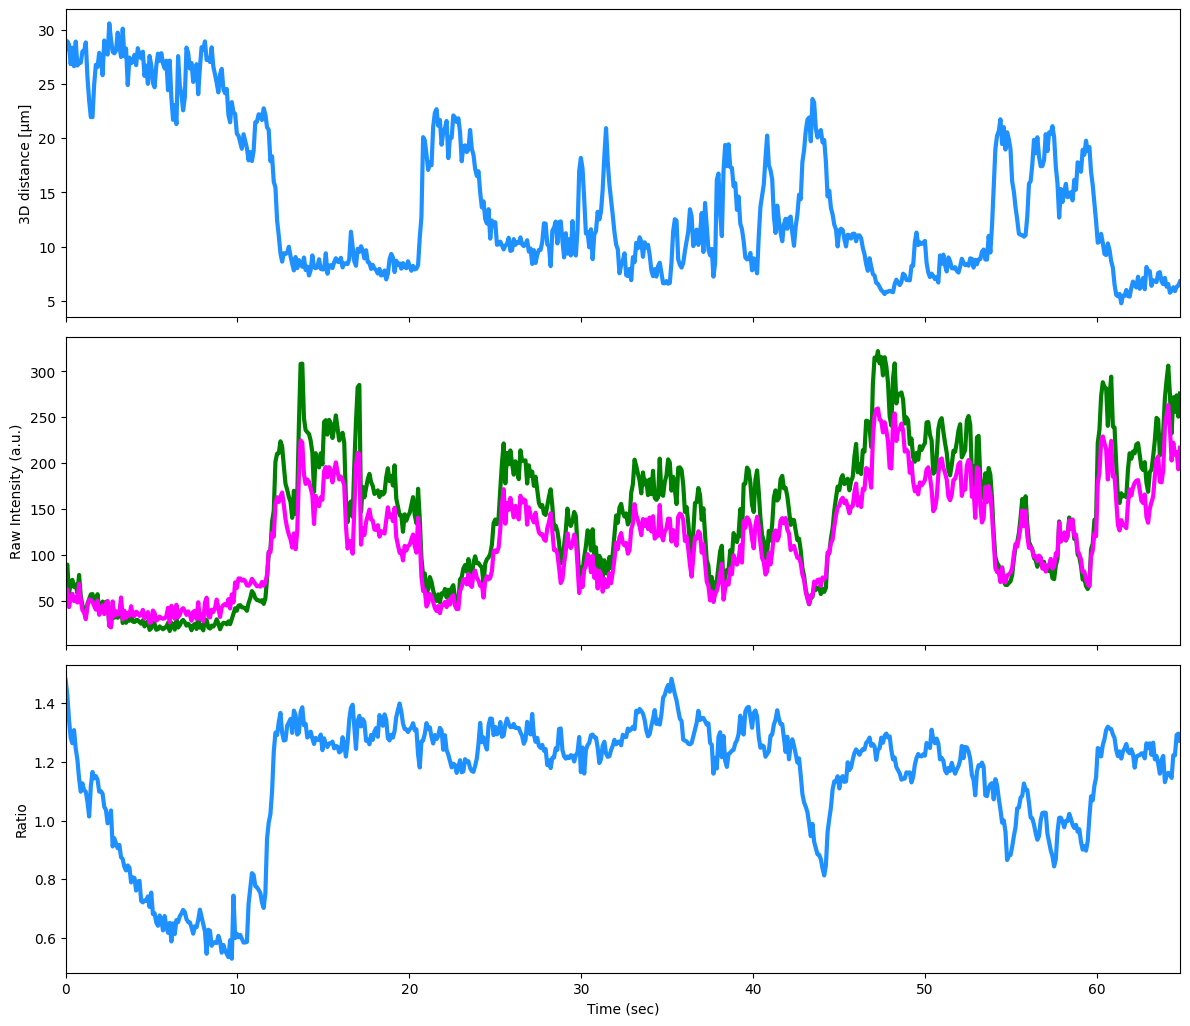

In [2]:
# === ライブラリのインポート ===
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === パラメータ設定（元の値を維持） ===
sampling_rate = 10.24  # ※今回は使わない（3Dtimestampを直接使用）
volume_start = 1       # ※今回は使わない
width = 12
aspect_ratio = 5.71 / 6.61
height = width * aspect_ratio

# === ファイル読み込み ===
file_path = "tardigrade_t=1~665_mCherry_GCAMP6s_v3.csv"
df = pd.read_csv(file_path)

# === 時間軸はアップロードデータの3Dtimestamp（秒）をそのまま使用 ===
time_sec = df["3Dtimestamp"].to_numpy()

# === グラフ描画 ===
fig, axs = plt.subplots(3, 1, figsize=(width, height), sharex=True)

# --- 1. 3D Distance ---
axs[0].plot(time_sec, df["3D distance (µm)"], color="dodgerblue", linewidth=3)
axs[0].set_ylabel("3D distance [µm]")
axs[0].tick_params(axis='x', labelbottom=False)

# --- 2. Raw Intensities ---
axs[1].plot(time_sec, df["GCaMP6s"], color="green", linewidth=3, label="GCaMP6s")
axs[1].plot(time_sec, df["mCherry"], color="magenta", linewidth=3, label="mCherry")
axs[1].set_ylabel("Raw Intensity (a.u.)")
axs[1].tick_params(axis='x', labelbottom=False)
#axs[1].legend(loc="upper right", frameon=False)

# --- 3. Ratio（既存の列を使用）---
axs[2].plot(time_sec, df["Ratio"], color="dodgerblue", linewidth=3)
axs[2].set_ylabel("Ratio")
axs[2].set_xlabel("Time (sec)")

# === x軸設定 ===
tmin, tmax = np.nanmin(time_sec), np.nanmax(time_sec)
tick_step = 10.0 if (tmax - tmin) > 10 else max(1.0, (tmax - tmin) / 5)
axs[2].set_xticks(np.arange(np.floor(tmin / tick_step) * tick_step, tmax + tick_step, tick_step))
axs[2].set_xlim(tmin, tmax)

# === 枠線表示＆グリッドなし ===
for ax in axs:
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(True)

plt.tight_layout()

# === 画像として保存（任意） ===
output_filename = "tardigrade_3Dintensity_ratio_plot_3Dtimestamp.png"
fig.savefig(output_filename, dpi=300, bbox_inches='tight')

# === グラフ表示 ===
plt.show()


=== Pearson correlation (Ratio vs 3D distance) ===
n = 665
r = -0.7182
t(663) = -26.5725
p (two-sided) = 1.72842e-106
95% CI for r = [-0.7531, -0.6792]

=== Linear regression: 3D distance = a*Ratio + b ===
a (slope)     = -22.5234
b (intercept) = 39.8598
R^2           = 0.515740
p (slope)     = 1.72842e-106
StdErr(slope) = 0.84762


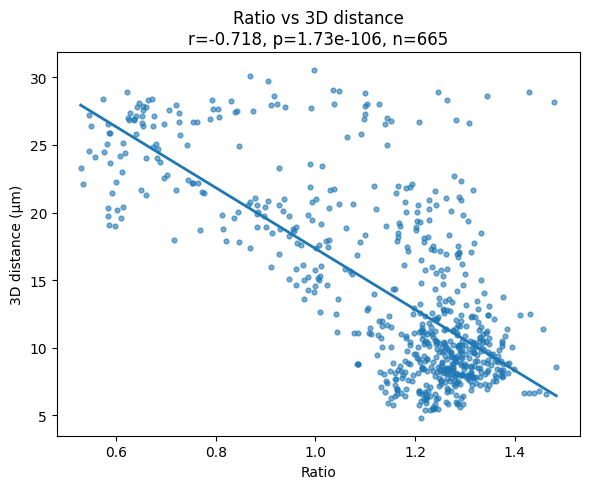

In [3]:
# === 相関解析（Ratio vs 3D distance [µm]） ===
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 列名（必要に応じて変更）
col_ratio = "Ratio"
col_dist  = "3D distance (µm)"

# NaN除外
x = df[col_ratio].to_numpy(dtype=float)
y = df[col_dist].to_numpy(dtype=float)
mask = np.isfinite(x) & np.isfinite(y)
xv, yv = x[mask], y[mask]

n = len(xv)
if n < 3:
    raise ValueError("有効データ点が少なすぎます（n < 3）。")

# --- ピアソン相関 ---
r, p_two_sided = stats.pearsonr(xv, yv)

# 相関のt検定（rから算出： df = n-2）
dfree = n - 2
t_stat = r * np.sqrt(dfree / max(1e-12, (1.0 - r**2)))  # 数値安定
# p値は pearsonr のもの（両側）を採用

# 95% CI（Fisher z 変換）
z = np.arctanh(np.clip(r, -0.999999, 0.999999))
se = 1 / np.sqrt(n - 3)
z_lo, z_hi = z - 1.96 * se, z + 1.96 * se
r_lo, r_hi = np.tanh([z_lo, z_hi])

print("=== Pearson correlation (Ratio vs 3D distance) ===")
print(f"n = {n}")
print(f"r = {r:.4f}")
print(f"t({dfree}) = {t_stat:.4f}")
print(f"p (two-sided) = {p_two_sided:.6g}")
print(f"95% CI for r = [{r_lo:.4f}, {r_hi:.4f}]")

# --- 線形回帰（y = a*x + b） ---
lin = stats.linregress(xv, yv)
print("\n=== Linear regression: 3D distance = a*Ratio + b ===")
print(f"a (slope)     = {lin.slope:.6g}")
print(f"b (intercept) = {lin.intercept:.6g}")
print(f"R^2           = {lin.rvalue**2:.6f}")
print(f"p (slope)     = {lin.pvalue:.6g}")
print(f"StdErr(slope) = {lin.stderr:.6g}")

# --- 散布図 + 回帰直線を描画・保存 ---
fig2, ax2 = plt.subplots(figsize=(6, 5))
ax2.scatter(xv, yv, s=12, alpha=0.6)
# 回帰直線
xx = np.linspace(np.nanmin(xv), np.nanmax(xv), 200)
yy = lin.slope * xx + lin.intercept
ax2.plot(xx, yy, linewidth=2)

ax2.set_xlabel("Ratio")
ax2.set_ylabel("3D distance (µm)")
ax2.set_title(f"Ratio vs 3D distance\nr={r:.3f}, p={p_two_sided:.3g}, n={n}")
ax2.grid(False)
for spine in ax2.spines.values():
    spine.set_visible(True)

fig2.tight_layout()
fig2.savefig("ratio_vs_3Ddistance_scatter_regression.png", dpi=300, bbox_inches="tight")
# plt.show()  # すでに上で表示しているなら省略可
